# Packages Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.gridspec import GridSpec
from matplotlib.cm import get_cmap
import matplotlib.patches as mpatches
%matplotlib inline

# Importing Data

In [2]:
missing_values = ["n/a", "na", "N.A.", "--"]
df = pd.read_csv('cardio_good_fitness.csv', na_values = missing_values)

In [3]:
df_og_bkup = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        183 non-null    object 
 1   Branch         183 non-null    object 
 2   Age            174 non-null    float64
 3   Gender         180 non-null    object 
 4   Education      180 non-null    float64
 5   MaritalStatus  180 non-null    object 
 6   Usage          172 non-null    float64
 7   Fitness        180 non-null    float64
 8   Income         180 non-null    float64
 9   Miles          180 non-null    float64
dtypes: float64(6), object(4)
memory usage: 14.4+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,174.000000,180.000000,172.000000,180.000000,180.000000,180.000000
mean,28.781609,15.572222,3.476744,3.311111,53719.577778,103.194444
std,7.062766,1.617055,1.105296,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df_cat = df.select_dtypes(['object']).copy()
df_cat.describe()

,Product,Branch,Gender,MaritalStatus
count,183,183,180,180
unique,3,4,2,4
top,TM195,South,Male,Partnered
freq,81,50,104,102


## Data Cleansing (NULL or Missing Values)

In [7]:
df[df['Education'].isnull()]

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
3,TM195,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,TM498,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,TM798,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df[df['Income'].isnull()]

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
3,TM195,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,TM498,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,TM798,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
genIndex = df[df['Education'].isnull()].index
df = df.drop(genIndex)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    object 
 1   Branch         180 non-null    object 
 2   Age            174 non-null    float64
 3   Gender         180 non-null    object 
 4   Education      180 non-null    float64
 5   MaritalStatus  180 non-null    object 
 6   Usage          172 non-null    float64
 7   Fitness        180 non-null    float64
 8   Income         180 non-null    float64
 9   Miles          180 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.5+ KB


In [10]:
df.isnull().sum()

Product          0
Branch           0
Age              6
Gender           0
Education        0
MaritalStatus    0
Usage            8
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
df['Age'] = df['Age'].apply(lambda x: x if x > 0 else 0)
median = df['Age'].median()
df['Age'].replace(0, median, inplace=True)
df['Age'] = df['Age'].astype(int)

In [12]:
df.isnull().sum()

Product          0
Branch           0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            8
Fitness          0
Income           0
Miles            0
dtype: int64

In [13]:
df['Usage'] = df['Usage'].apply(lambda x: x if x > 0 else 0)
median = df['Usage'].median()
df['Usage'].replace(0, median, inplace=True)
df['Usage'] = df['Usage'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    object 
 1   Branch         180 non-null    object 
 2   Age            180 non-null    int32  
 3   Gender         180 non-null    object 
 4   Education      180 non-null    float64
 5   MaritalStatus  180 non-null    object 
 6   Usage          180 non-null    int32  
 7   Fitness        180 non-null    float64
 8   Income         180 non-null    float64
 9   Miles          180 non-null    float64
dtypes: float64(4), int32(2), object(4)
memory usage: 14.1+ KB


## Data Cleansing (Wrong Values)

In [15]:
df['MaritalStatus'].value_counts()

Partnered    102
Single        70
P              5
S              3
Name: MaritalStatus, dtype: int64

In [16]:
df['MaritalStatus'].replace('S', 'Single', inplace=True)
df['MaritalStatus'].replace('P', 'Partnered', inplace=True)
df_cat = df.select_dtypes(['object']).copy()
df_cat.describe()

,Product,Branch,Gender,MaritalStatus
count,180,180,180,180
unique,3,4,2,2
top,TM195,South,Male,Partnered
freq,80,48,104,107


## Data Cleansing (Datatypes)

In [17]:
df['Education'] = df['Education'].astype(int)
df['Fitness'] = df['Fitness'].astype(int)
df['Income'] = df['Income'].astype(int)
df['Miles'] = df['Miles'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Branch         180 non-null    object
 2   Age            180 non-null    int32 
 3   Gender         180 non-null    object
 4   Education      180 non-null    int32 
 5   MaritalStatus  180 non-null    object
 6   Usage          180 non-null    int32 
 7   Fitness        180 non-null    int32 
 8   Income         180 non-null    int32 
 9   Miles          180 non-null    int32 
dtypes: int32(6), object(4)
memory usage: 11.2+ KB


## Additional Columns

In [18]:
conditions = [
    (df['Age'] <= 29),
    (df['Age'] <= 39),
    (df['Age'] > 39)
]

values = ["Before 30", "Between 30 and 40", "After 40"]

df['AgeGroup'] = np.select(conditions, values)

In [19]:
conditions = [
    (df['Income'] <= df['Income'].describe()['25%']),
    (df['Income'] <= df['Income'].describe()['75%']),
    (df['Income'] > df['Income'].describe()['75%'])
]

values = ["Low", "Medium", "High"]

df['IncomeBin'] = np.select(conditions, values)

In [20]:
df['MilesPerUsage'] = round(df['Miles'] / df['Usage'])


In [21]:
df['Count'] = df['Product'].apply(lambda x: 1 if x != 0 else 0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    object 
 1   Branch         180 non-null    object 
 2   Age            180 non-null    int32  
 3   Gender         180 non-null    object 
 4   Education      180 non-null    int32  
 5   MaritalStatus  180 non-null    object 
 6   Usage          180 non-null    int32  
 7   Fitness        180 non-null    int32  
 8   Income         180 non-null    int32  
 9   Miles          180 non-null    int32  
 10  AgeGroup       180 non-null    object 
 11  IncomeBin      180 non-null    object 
 12  MilesPerUsage  180 non-null    float64
 13  Count          180 non-null    int64  
dtypes: float64(1), int32(6), int64(1), object(6)
memory usage: 16.9+ KB


## Encoding Column & Heatmap Prep

In [23]:
df_bkup_null_clear = df.copy()
df_bkup_null_clear = df_bkup_null_clear.drop(['Count'], axis=1)

In [24]:
cat_to_num_map = {'Product':{'TM195':0, 'TM498':1,'TM798':2},
             'Branch':{'North':0, 'South':1,'East':2, 'West':3, 'Gd':4, 'Ex':5},
             'Gender':{'Female':0, 'Male':1},
             'MaritalStatus':{'Single':0, 'Partnered':1},
             'AgeGroup':{'Before 30':0, 'Between 30 and 40':1, 'After 40':2},
             'IncomeBin':{'Low':0, 'Medium':1, 'High':2}}

df_bkup_null_clear.replace(cat_to_num_map, inplace=True)

In [25]:
df_bkup_null_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        180 non-null    int64  
 1   Branch         180 non-null    int64  
 2   Age            180 non-null    int32  
 3   Gender         180 non-null    int64  
 4   Education      180 non-null    int32  
 5   MaritalStatus  180 non-null    int64  
 6   Usage          180 non-null    int32  
 7   Fitness        180 non-null    int32  
 8   Income         180 non-null    int32  
 9   Miles          180 non-null    int32  
 10  AgeGroup       180 non-null    int64  
 11  IncomeBin      180 non-null    int64  
 12  MilesPerUsage  180 non-null    float64
dtypes: float64(1), int32(6), int64(6)
memory usage: 15.5 KB


## Univariate Analysis

In [26]:
print(df['Product'].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


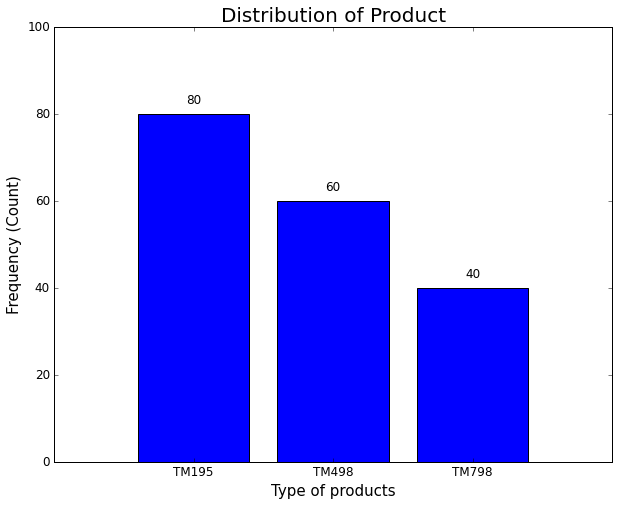

In [27]:
proCount = df.groupby('Product')['Count'].count()
products = proCount.index.tolist()

plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.bar(products,proCount, align='center')
plt.title('Distribution of Product', fontsize = 20)
plt.ylabel('Frequency (Count)', fontsize = 15)
plt.xlabel('Type of products', fontsize = 15)
plt.xlim(left=-1,right=len(products))
plt.ylim(bottom=0,top=max(proCount)+20)

for x,y in zip(products ,proCount):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.show()

In [28]:
print(df['Branch'].value_counts())

South    48
West     47
East     45
North    40
Name: Branch, dtype: int64


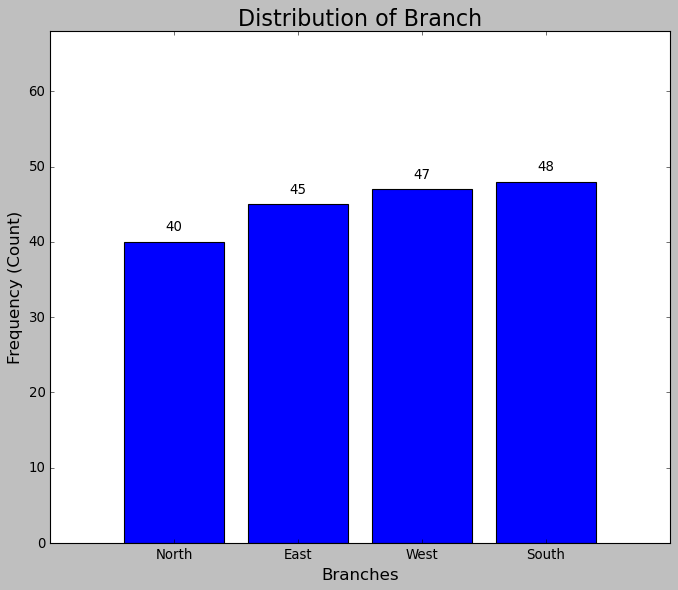

In [29]:
braCount = df.groupby('Branch')['Count'].count()
braCount.sort_values(ascending=True, inplace=True)
branches = braCount.index.tolist()

plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.bar(branches,braCount, align='center')
x = np.arange(len(branches))
plt.title('Distribution of Branch', fontsize = 20)
plt.ylabel('Frequency (Count)', fontsize = 15)
plt.xlabel('Branches', fontsize = 15)
plt.xlim(left=-1,right=len(branches))
plt.ylim(bottom=0,top=max(braCount)+20)

for x,y in zip(branches ,braCount):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.show()

In [30]:
df['Age'].describe()

count    180.000000
mean      28.688889
std        6.961417
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

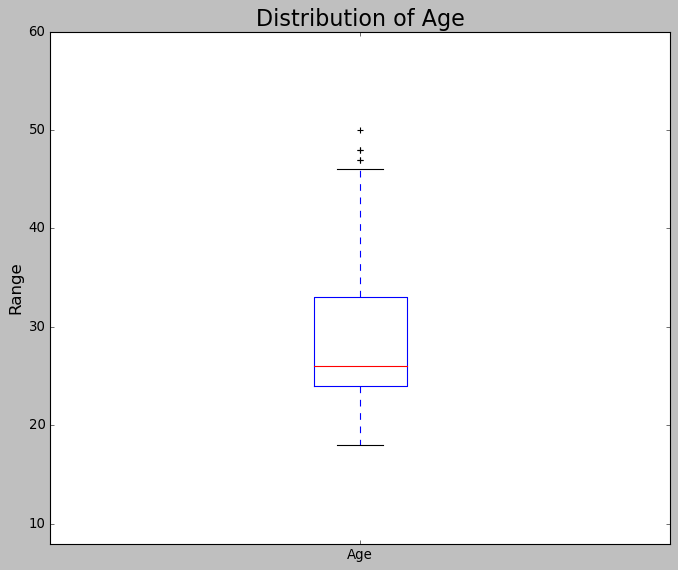

In [31]:
plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.title('Distribution of Age', fontsize = 20)
plt.ylabel('Range', fontsize = 15)
plt.ylim(bottom=min(df['Age'])-10,top=max(df['Age']) + 10)

plt.boxplot(df['Age'], labels = ['Age'])
plt.show()

In [32]:
print(df['AgeGroup'].value_counts())

Before 30            113
Between 30 and 40     50
After 40              17
Name: AgeGroup, dtype: int64


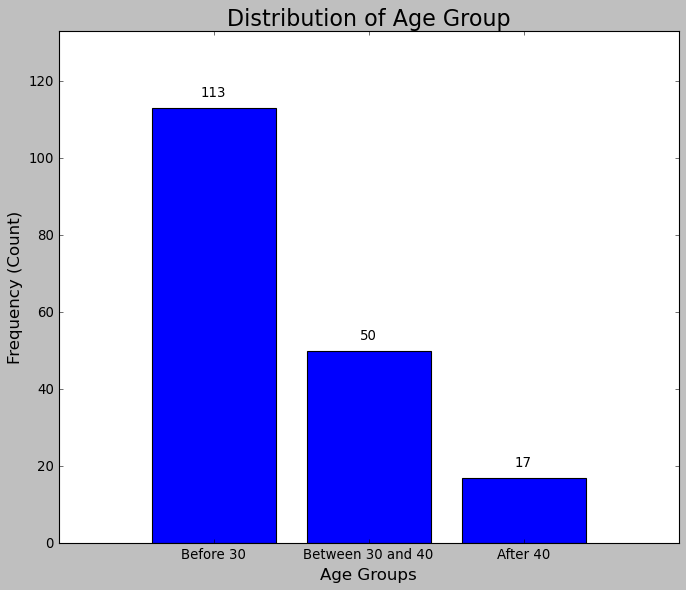

In [33]:
agCount = df.groupby('AgeGroup')['Count'].count()
agCount.sort_values(ascending=False, inplace=True)
agegroup = agCount.index.tolist()

plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.bar(agegroup,agCount, align='center')
plt.title('Distribution of Age Group', fontsize = 20)
plt.ylabel('Frequency (Count)', fontsize = 15)
plt.xlabel('Age Groups', fontsize = 15)
plt.xlim(left=-1,right=len(agegroup))
plt.ylim(bottom=0,top=max(agCount)+20)

for x,y in zip(agegroup ,agCount):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.show()

In [34]:
print(df['Gender'].value_counts())

Male      104
Female     76
Name: Gender, dtype: int64


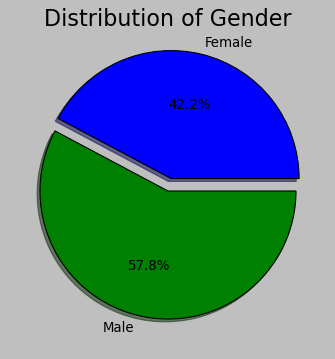

In [35]:
genCount = df.groupby('Gender')['Count'].count()
genCount.sort_values(ascending=True, inplace=True)
Gender = genCount.index.tolist()


plt.figure(figsize=(10,5))

plt.title('Distribution of Gender', fontsize = 20)


plt.pie(genCount, labels = Gender, explode=(0.1,0), autopct='%1.1f%%', shadow=True)

plt.show()

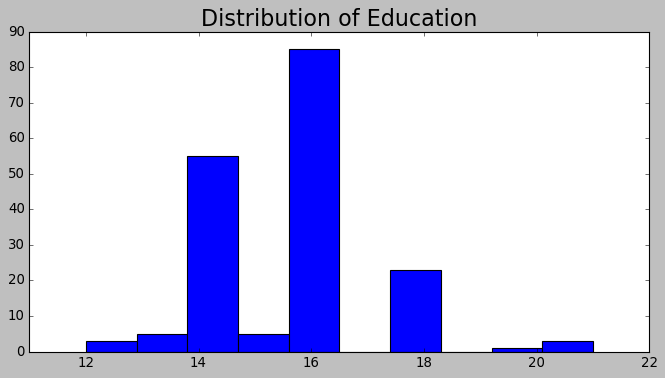

In [36]:
plt.figure(figsize=(10,5))
plt.hist(df['Education'])
plt.title('Distribution of Education', fontsize = 20)
plt.xlim(left=min(df['Education'])-1,right=max(df['Education'])+1)
plt.show()

In [37]:
print(df['MaritalStatus'].value_counts())

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


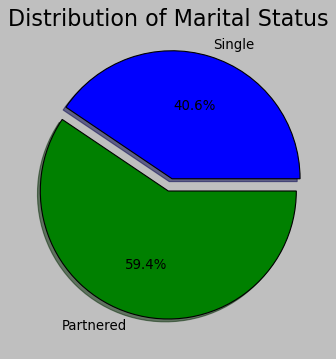

In [38]:
msCount = df.groupby('MaritalStatus')['Count'].count()
msCount.sort_values(ascending=True, inplace=True)
MStatus = msCount.index.tolist()

plt.figure(figsize=(10,5))

plt.title('Distribution of Marital Status', fontsize = 20)


plt.pie(msCount, labels = MStatus, explode=(0.1,0), autopct='%1.1f%%', shadow=True)

plt.show()

In [39]:
df['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

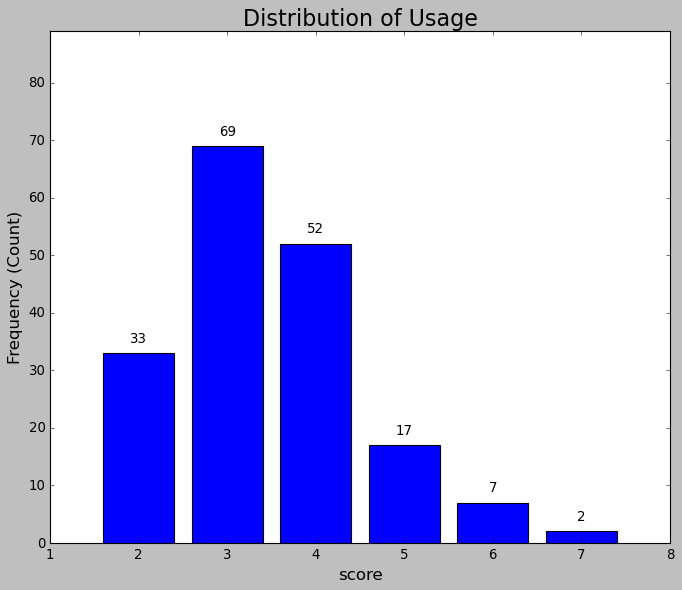

In [40]:
uCount = df.groupby('Usage')['Count'].count()
usage = uCount.index.tolist()

plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.bar(usage,uCount, align='center')
plt.title('Distribution of Usage', fontsize = 20)
plt.ylabel('Frequency (Count)', fontsize = 15)
plt.xlabel('score', fontsize = 15)
plt.xlim(left=1,right=len(usage)+2)
plt.ylim(bottom=0,top=max(uCount)+20)

for x,y in zip(usage ,uCount):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [41]:
print(df['Fitness'].value_counts())

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


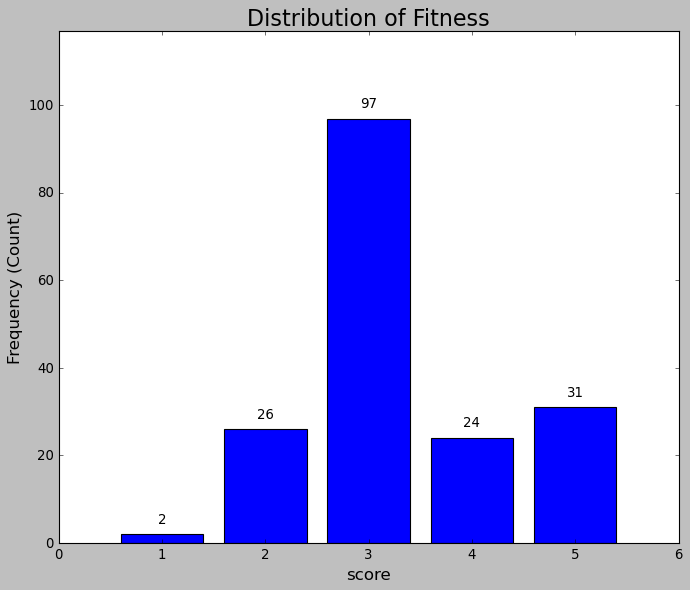

In [42]:
fitCount = df.groupby('Fitness')['Count'].count()
fitness = fitCount.index.tolist()

plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.bar(fitness,fitCount, align='center')
plt.title('Distribution of Fitness', fontsize = 20)
plt.ylabel('Frequency (Count)', fontsize = 15)
plt.xlabel('score', fontsize = 15)
plt.xlim(left=0,right=len(fitness)+1)
plt.ylim(bottom=0,top=max(fitCount)+20)

for x,y in zip(fitness ,fitCount):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    

In [43]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

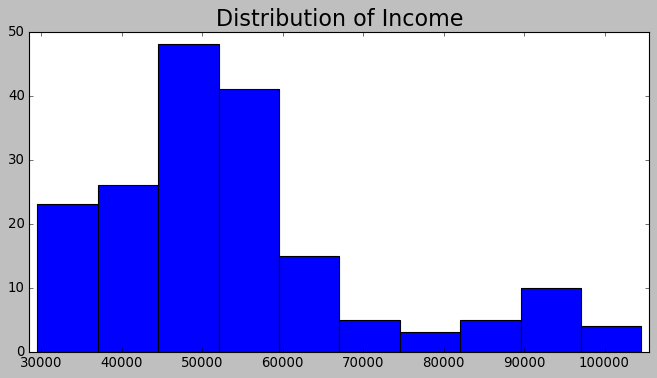

In [44]:
plt.figure(figsize=(10,5))
plt.hist(df['Income'])
plt.title('Distribution of Income', fontsize = 20)
plt.xlim(left=min(df['Income'])-1000,right=max(df['Income'])+1000)
plt.show()

In [45]:
print(df['IncomeBin'].value_counts())

Medium    90
Low       45
High      45
Name: IncomeBin, dtype: int64


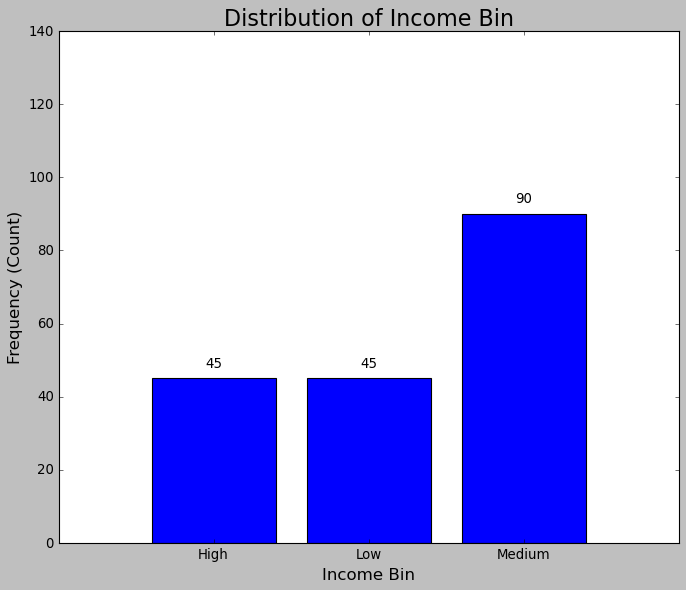

In [46]:
ibCount = df.groupby('IncomeBin')['Count'].count()
#ibCount.sort_values(ascending=True, inplace=True)
incomebin = ibCount.index.tolist()

plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.bar(incomebin,ibCount, align='center')
plt.title('Distribution of Income Bin', fontsize = 20)
plt.ylabel('Frequency (Count)', fontsize = 15)
plt.xlabel('Income Bin', fontsize = 15)
plt.xlim(left=-1,right=len(incomebin))
plt.ylim(bottom=0,top=max(ibCount)+50)

for x,y in zip(incomebin ,ibCount):

    label = "{:d}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.show()

In [47]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

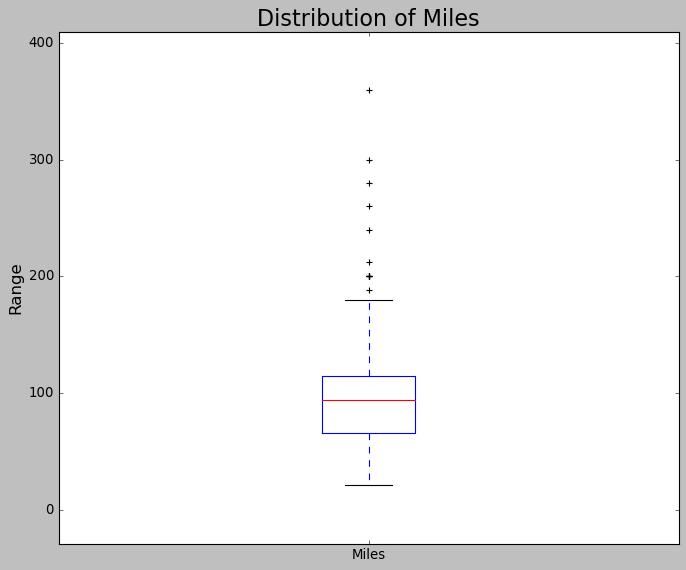

In [48]:
plt.figure(figsize=(10,8))
plt.style.use('classic')
plt.title('Distribution of Miles', fontsize = 20)
plt.ylabel('Range', fontsize = 15)
plt.ylim(bottom=min(df['Miles'])-50,top=max(df['Miles']) + 50)

plt.boxplot(df['Miles'], labels = ['Miles'])
plt.show()

In [49]:
df['MilesPerUsage'].describe()

count    180.000000
mean      29.383333
std        9.189668
min       10.000000
25%       24.000000
50%       28.000000
75%       33.000000
max       90.000000
Name: MilesPerUsage, dtype: float64

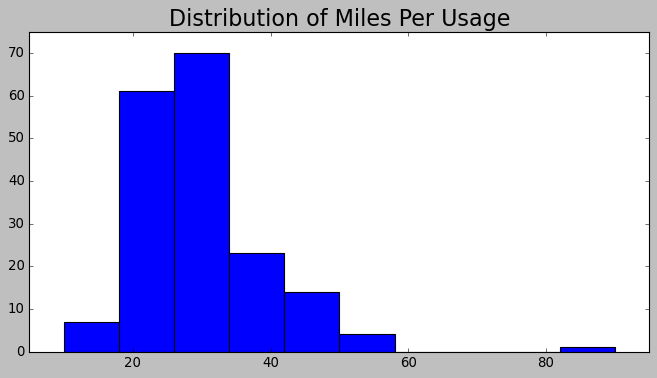

In [50]:
plt.figure(figsize=(10,5))
plt.hist(df['MilesPerUsage'])
plt.title('Distribution of Miles Per Usage', fontsize = 20)
plt.xlim(left=min(df['MilesPerUsage'])-5,right=max(df['MilesPerUsage'])+5)
plt.ylim(bottom = 0, top = 75)
plt.show()

## Multivariate Analysis

### Heatmap

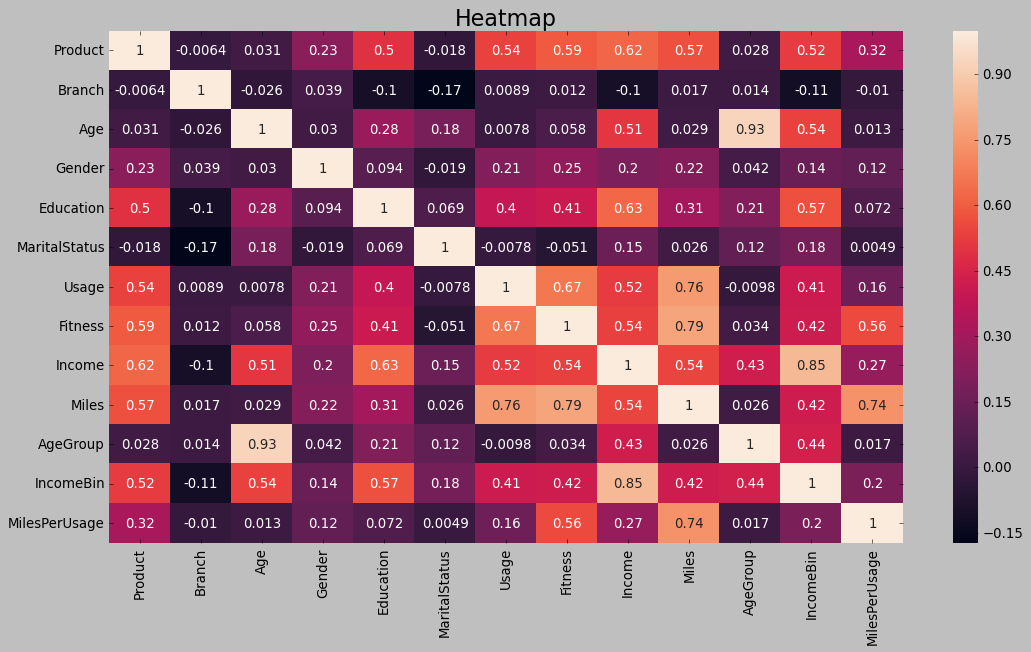

In [51]:
plt.figure(figsize=(16,8))
plt.title('Heatmap', fontsize = 20)
corr = df_bkup_null_clear.astype(float).corr()
sns.heatmap(corr, annot=True)
plt.show()

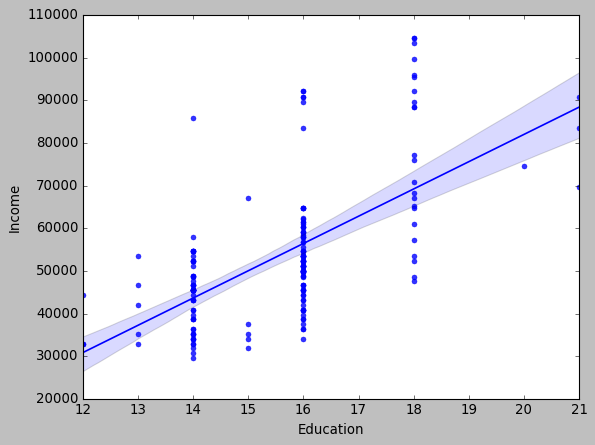

In [52]:
sns.regplot(x='Education', y='Income', data=df)
plt.show()

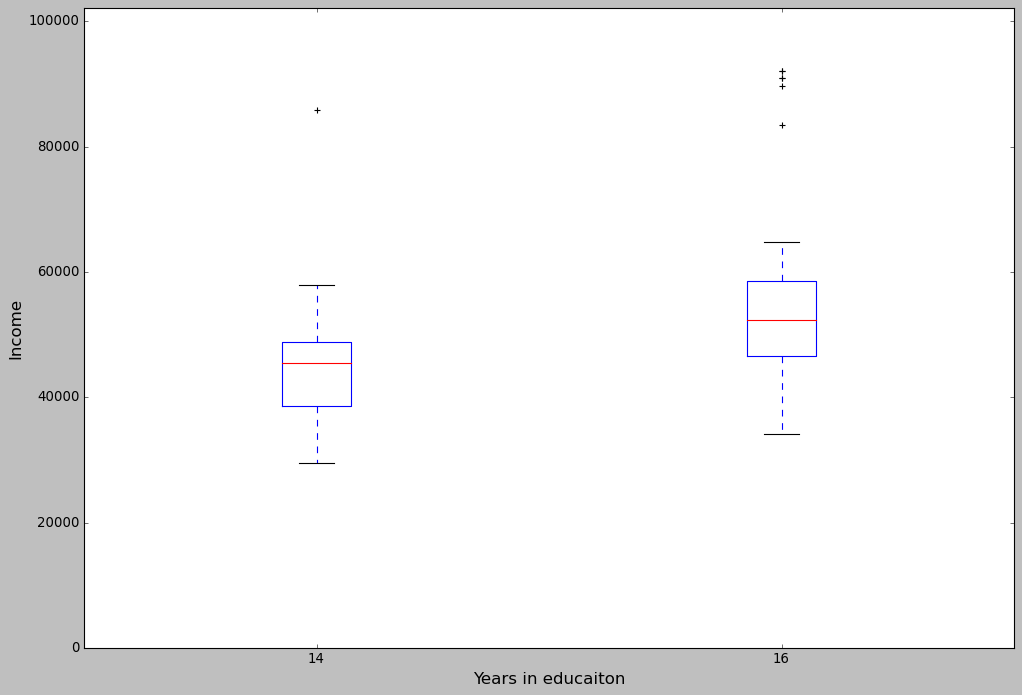

In [53]:
eduYears = [14, 16]
plot = []
max_value = 0
min_value = 0

for e in eduYears:
    temp = df[df["Education"]== e]
    frequency = temp['Income']
    if max_value < max(frequency):
        max_value = max(frequency)
    if min_value > min(frequency):
        min_value = min(frequency)
    plot.append(frequency)
plt.figure(figsize=(15,10))
plt.style.use('classic')
plt.xlabel('Years in educaiton', fontsize = 15)
plt.ylabel('Income', fontsize = 15)
plt.ylim(bottom=min_value,top=max_value + 10000)

plt.boxplot(plot, labels = eduYears)
plt.show()

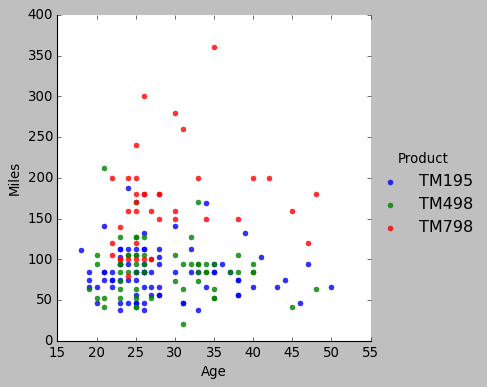

In [54]:

sns.lmplot(x='Age', y='Miles', data=df, fit_reg=False, hue='Product')
plt.show()

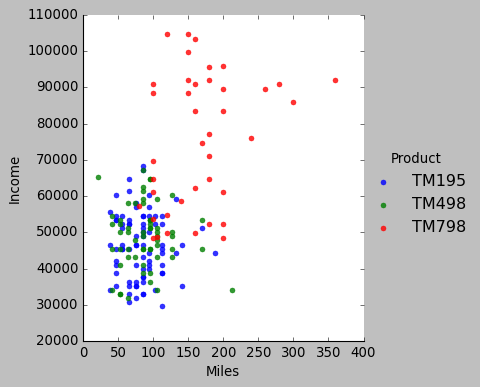

In [55]:
sns.lmplot(x='Miles', y='Income', data=df, fit_reg=False, hue='Product')
plt.show()

# Visualizations

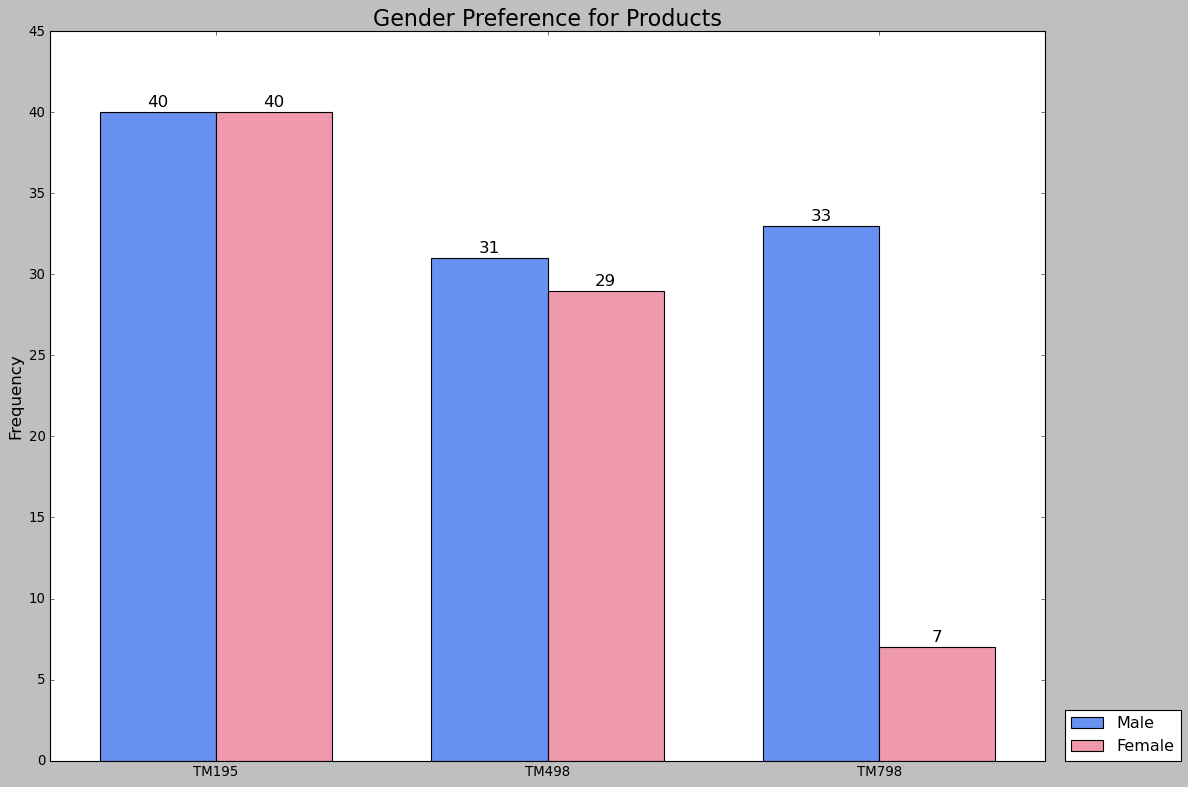

In [56]:
def autolabel1(bars):
    for each in bars:
        height = each.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 15)

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
def plotGenPref():
    products = df['Product'].unique().tolist()
    genders = df['Gender'].unique().tolist()                        
    genbin = []
    max_value = 0

    for p in products:
        temp = df[df["Product"]== p]
        gencounts = []
        for g in genders:
            count = temp[temp['Gender']==g]['Count'].count()
            gencounts.append(count)
            if max_value < count:
                max_value = count
        genbin.append(gencounts)
        
    male,female = map(list, zip(*genbin))
    x = np.arange(len(products))
    width = 0.35  
    
    MPref = ax1.bar(x - width/2, male, width, label='Male', color='#6890F0')
    FPref = ax1.bar(x + width/2, female, width, label='Female', color='#EE99AC')

    ax1.set_title('Gender Preference for Products', fontsize = 20)
    ax1.set_ylabel('Frequency', fontsize = 15)
    ax1.set_xticks(x)
    ax1.set_xticklabels(products)
    ax1.set_ylim(bottom = 0, top = max_value + 5)
    ax1.legend(loc=(1.02,0))

    autolabel1(MPref)
    autolabel1(FPref)
plotGenPref()
fig.tight_layout()

plt.show()

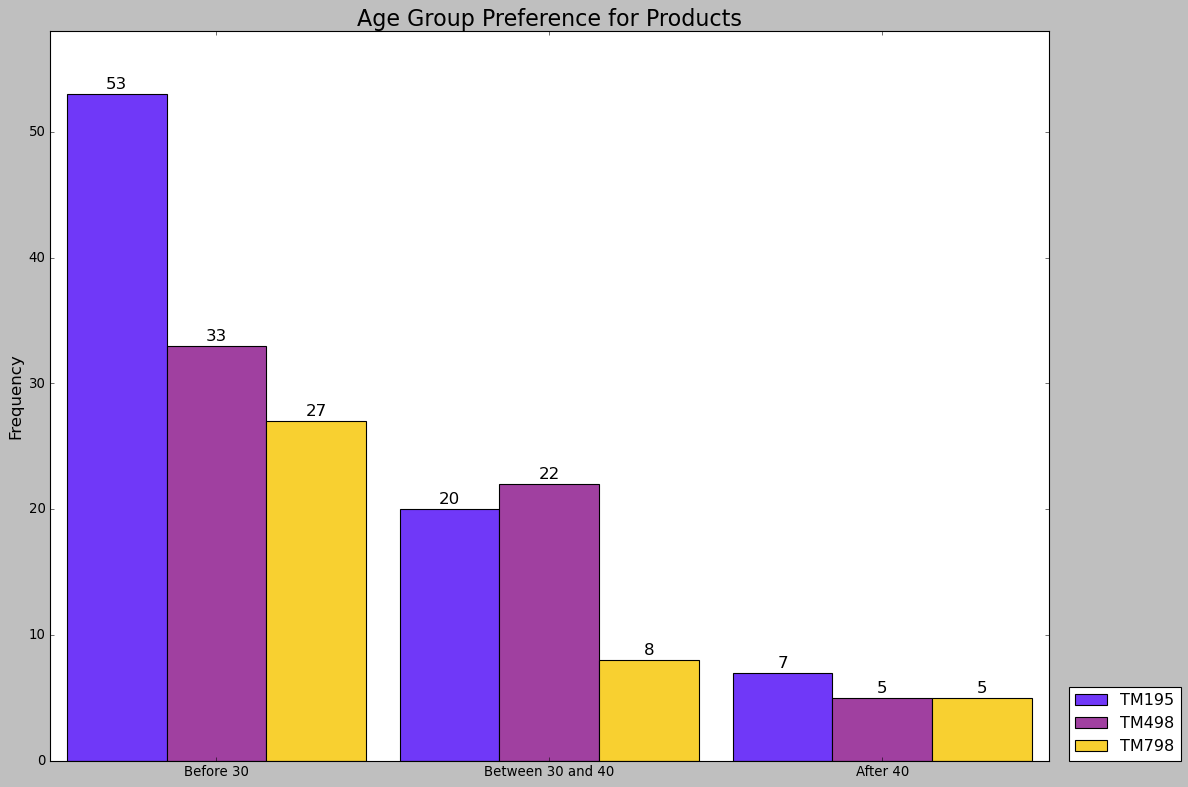

In [57]:
def autolabel2(bars):
    for each in bars:
        height = each.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 15)

fig, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
def plotAGPref():                      
    agegroup = df['AgeGroup'].unique().tolist()
    products = df['Product'].unique().tolist()                        
    agbin = []
    max_value = 0

    for ag in agegroup:
        temp = df[df["AgeGroup"]== ag]
        agcounts = []
        for p in products:
            count = temp[temp['Product']==p]['Count'].count()
            agcounts.append(count)
            if max_value < count:
                max_value = count
        agbin.append(agcounts)
        
    TM195,TM498,TM798 = map(list, zip(*agbin))
    x = np.arange(len(agegroup))
    width = 0.3  
    
    T1Bar = ax2.bar(x - width, TM195, width, label='TM195', color='#7038F8')
    T4Bar = ax2.bar(x , TM498, width, label='TM498', color='#A040A0')
    T9Bar = ax2.bar(x + width, TM798, width, label='TM798', color='#F8D030')


    ax2.set_title('Age Group Preference for Products', fontsize = 20)
    ax2.set_ylabel('Frequency', fontsize = 15)
    ax2.set_xticks(x)
    ax2.set_xticklabels(agegroup)
    ax2.set_ylim(bottom = 0, top = max_value + 5)
    ax2.legend(loc=(1.02,0))

    autolabel2(T1Bar)
    autolabel2(T4Bar)
    autolabel2(T9Bar)
plotAGPref()
fig.tight_layout()

plt.show()

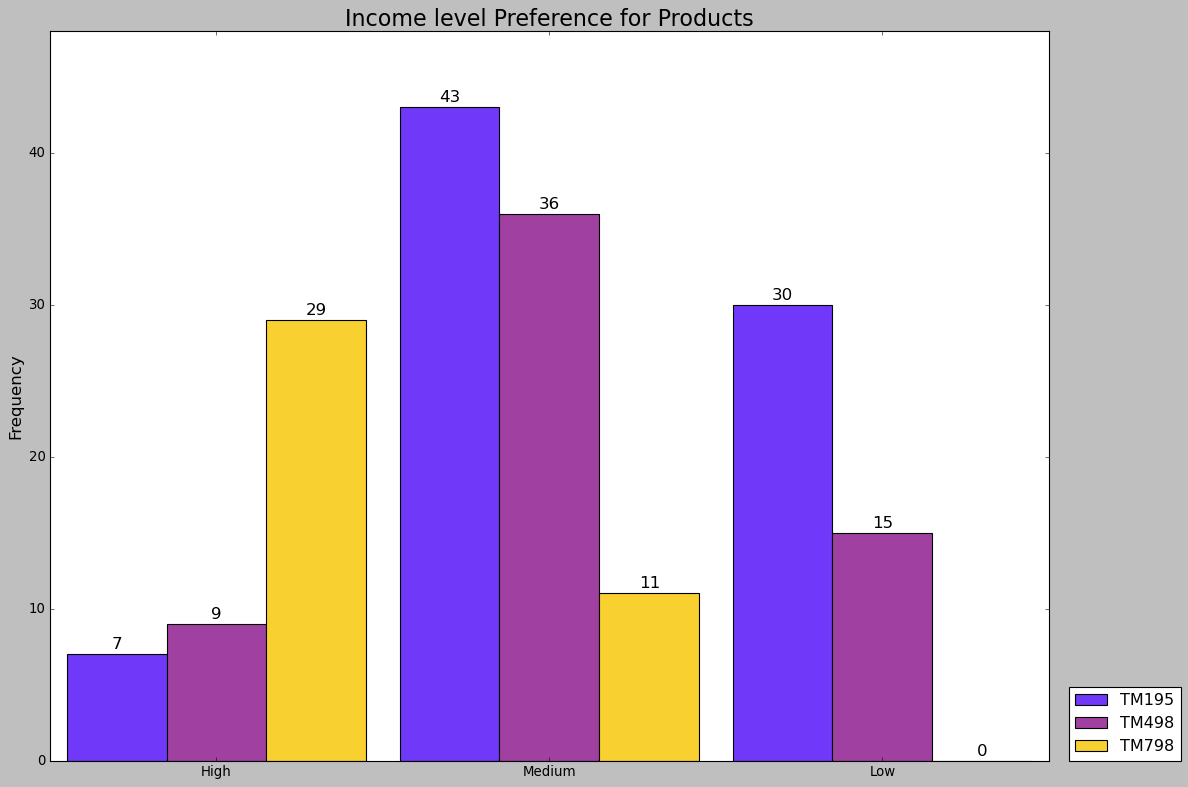

In [58]:
def autolabel3(bars):
    for each in bars:
        height = each.get_height()
        ax3.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 15)

fig, ax3 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
def plotIPref():
    incomebin = df['IncomeBin'].unique().tolist()
    products = df['Product'].unique().tolist()
    ibin = []
    max_value = 0
    for i in reversed(incomebin):
        temp = df[df["IncomeBin"]== i]
        ibcounts = []
        for p in products:
            count = temp[temp['Product']==p]['Count'].count()
            ibcounts.append(count)
            if max_value < count:
                max_value = count
        ibin.append(ibcounts)
    
    TM195,TM498,TM798 = map(list, zip(*ibin))
    x = np.arange(len(incomebin))
    width = 0.3  
    
    T1Bar = ax3.bar(x - width, TM195, width, label='TM195', color='#7038F8')
    T4Bar = ax3.bar(x , TM498, width, label='TM498', color='#A040A0')
    T9Bar = ax3.bar(x + width, TM798, width, label='TM798', color='#F8D030')


    ax3.set_title('Income level Preference for Products', fontsize = 20)
    ax3.set_ylabel('Frequency', fontsize = 15)
    ax3.set_xticks(x)
    ax3.set_xticklabels(reversed(incomebin))
    ax3.set_ylim(bottom = 0, top = max_value + 5)
    ax3.legend(loc=(1.02,0))

    autolabel3(T1Bar)
    autolabel3(T4Bar)
    autolabel3(T9Bar)
plotIPref()
fig.tight_layout()

plt.show()

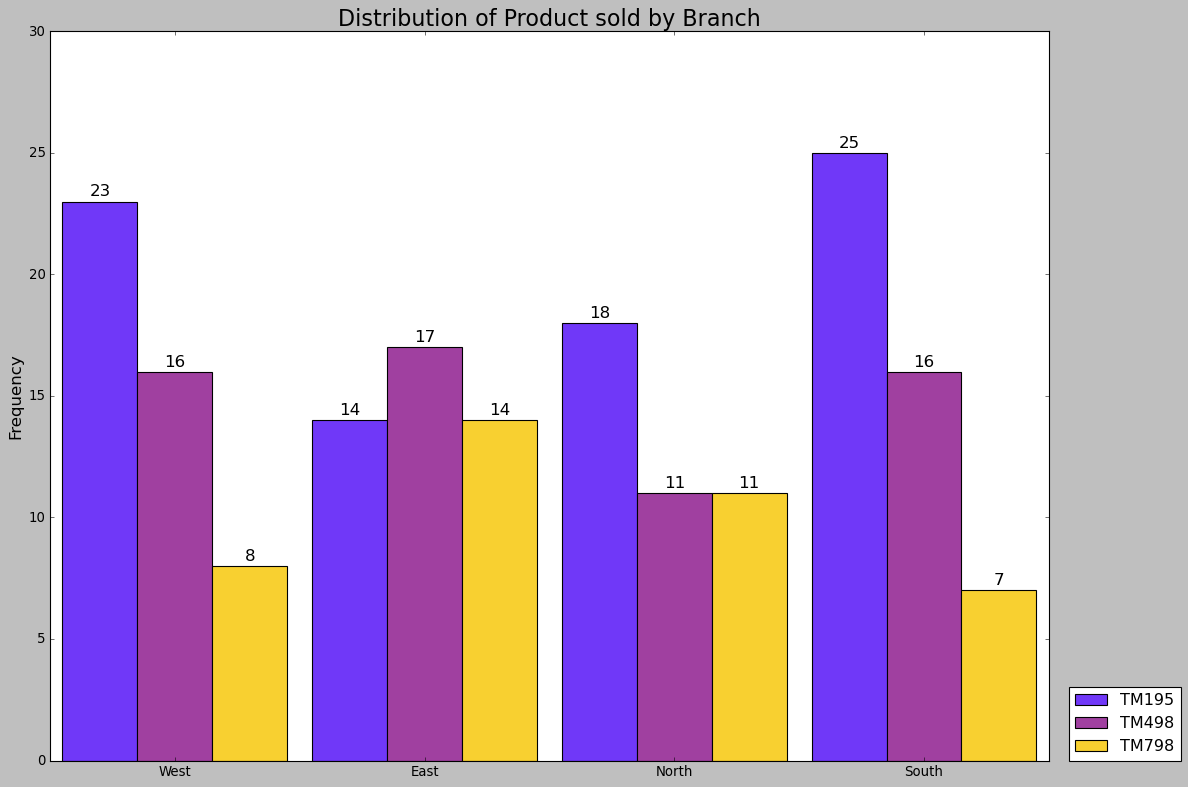

In [59]:
def autolabel4(bars):
    for each in bars:
        height = each.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 15)

fig, ax4 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
def plotPBdistri():
    branches = df['Branch'].unique().tolist()
    products = df['Product'].unique().tolist()
    bbin = []
    max_value = 0
    for b in branches:
        temp = df[df["Branch"]== b]
        bbcounts = []
        for p in products:
            count = temp[temp['Product']==p]['Count'].count()
            bbcounts.append(count)
            if max_value < count:
                max_value = count
        bbin.append(bbcounts)
    
    TM195,TM498,TM798 = map(list, zip(*bbin))
    x = np.arange(len(branches))
    width = 0.3  
    
    T1Bar = ax4.bar(x - width, TM195, width, label='TM195', color='#7038F8')
    T4Bar = ax4.bar(x , TM498, width, label='TM498', color='#A040A0')
    T9Bar = ax4.bar(x + width, TM798, width, label='TM798', color='#F8D030')


    ax4.set_title('Distribution of Product sold by Branch', fontsize = 20)
    ax4.set_ylabel('Frequency', fontsize = 15)
    ax4.set_xticks(x)
    ax4.set_xticklabels(branches)
    ax4.set_ylim(bottom = 0, top = max_value + 5)
    ax4.legend(loc=(1.02,0))

    autolabel4(T1Bar)
    autolabel4(T4Bar)
    autolabel4(T9Bar)
plotPBdistri()
fig.tight_layout()

plt.show()

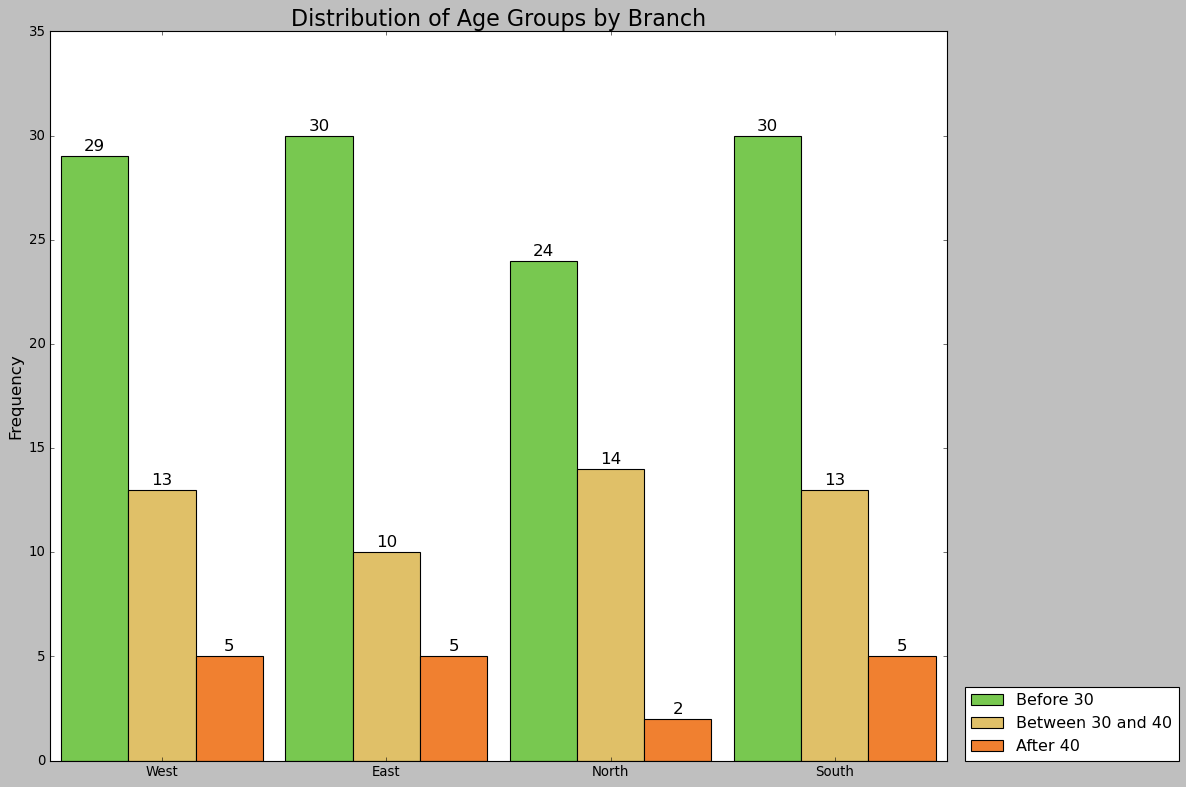

In [60]:
def autolabel5(bars):
    for each in bars:
        height = each.get_height()
        ax5.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 15)

fig, ax5 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
def plotAGBdistri():
    branches = df['Branch'].unique().tolist()
    agegroups = df['AgeGroup'].unique().tolist()
    bbin = []
    max_value = 0
    for b in branches:
        temp = df[df["Branch"]== b]
        bbcounts = []
        for ag in agegroups:
            count = temp[temp['AgeGroup']==ag]['Count'].count()
            bbcounts.append(count)
            if max_value < count:
                max_value = count
        bbin.append(bbcounts)
    
    B30,B40,A40 = map(list, zip(*bbin))
    x = np.arange(len(branches))
    width = 0.3  
    
    B30Bar = ax5.bar(x - width, B30, width, label='Before 30', color='#78C850')
    B4Bar = ax5.bar(x , B40, width, label='Between 30 and 40', color='#E0C068')
    A40Bar = ax5.bar(x + width, A40, width, label='After 40', color='#F08030')


    ax5.set_title('Distribution of Age Groups by Branch', fontsize = 20)
    ax5.set_ylabel('Frequency', fontsize = 15)
    ax5.set_xticks(x)
    ax5.set_xticklabels(branches)
    ax5.set_ylim(bottom = 0, top = max_value + 5)
    ax5.legend(loc=(1.02,0))

    autolabel5(B30Bar)
    autolabel5(B4Bar)
    autolabel5(A40Bar)
plotAGBdistri()
fig.tight_layout()

plt.show()

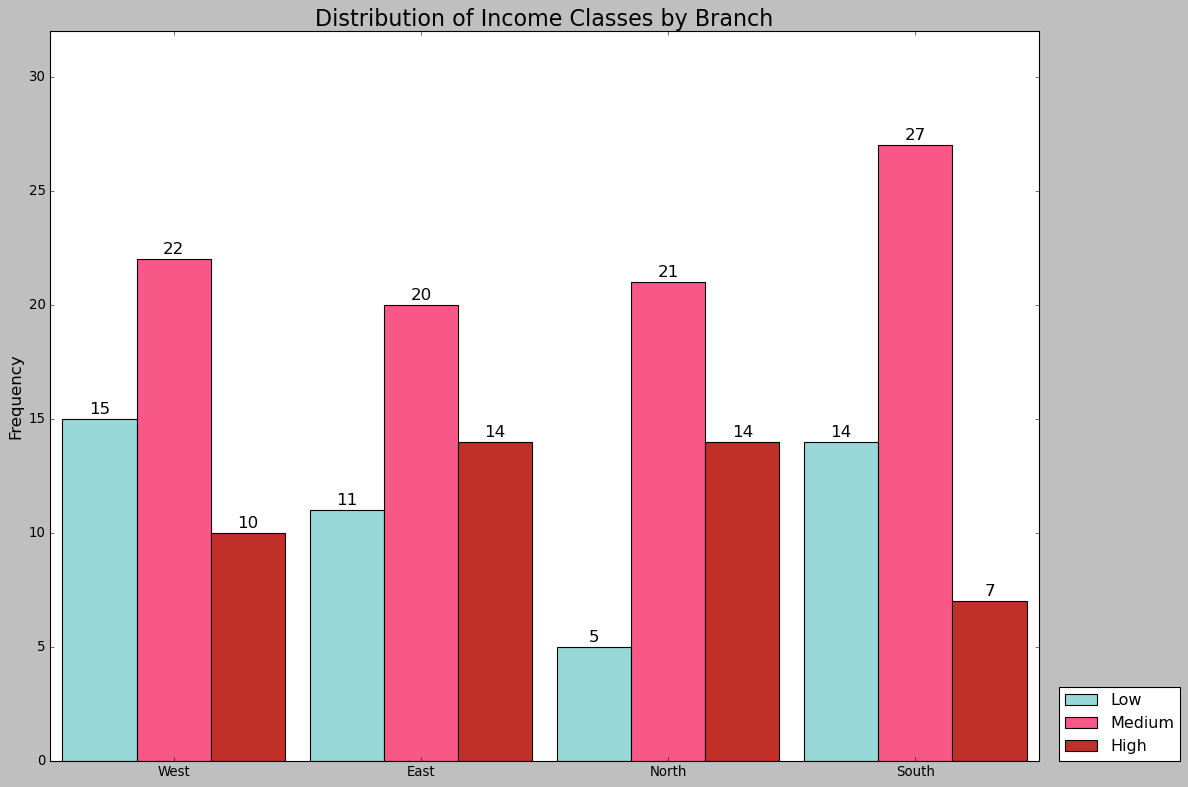

In [61]:
def autolabel6(bars):
    for each in bars:
        height = each.get_height()
        ax6.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 15)

fig, ax6 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
def plotIBBdistri():
    branches = df['Branch'].unique().tolist()
    incomebin = df['IncomeBin'].unique().tolist()
    bbin = []
    max_value = 0
    for b in branches:
        temp = df[df["Branch"]== b]
        bbcounts = []
        for ib in incomebin:
            count = temp[temp['IncomeBin']==ib]['Count'].count()
            bbcounts.append(count)
            if max_value < count:
                max_value = count
        bbin.append(bbcounts)
    
    low,medium,high = map(list, zip(*bbin))
    x = np.arange(len(branches))
    width = 0.3  
    
    LowBar = ax6.bar(x - width, low, width, label='Low', color='#98D8D8')
    MedBar = ax6.bar(x , medium, width, label='Medium', color= '#F85888')
    HighBar = ax6.bar(x + width, high, width, label='High', color='#C03028')


    ax6.set_title('Distribution of Income Classes by Branch', fontsize = 20)
    ax6.set_ylabel('Frequency', fontsize = 15)
    ax6.set_xticks(x)
    ax6.set_xticklabels(branches)
    ax6.set_ylim(bottom = 0, top = max_value + 5)
    ax6.legend(loc=(1.02,0))

    autolabel6(LowBar)
    autolabel6(MedBar)
    autolabel6(HighBar)
plotIBBdistri()
fig.tight_layout()

plt.show()

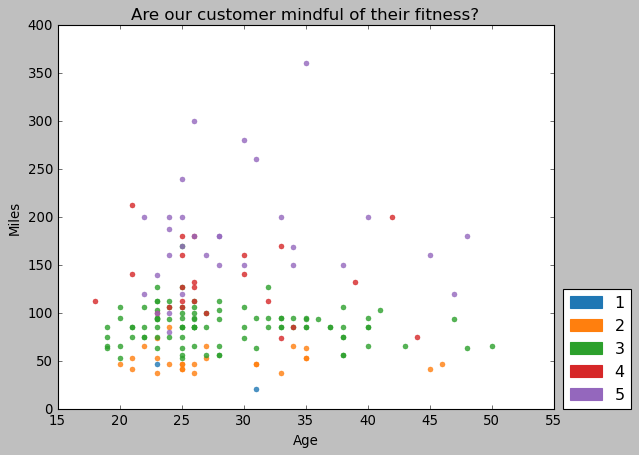

In [62]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):

    levels = sorted(data[hue].unique())
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots = sns.regplot(
            x=x,
            y=y,
            data=data[data[hue] == key],
            fit_reg=False,
            color=palette[key],
            **kwargs
        )
    return regplots

def plotAgeMileFitCorr():
    ax7 = hue_regplot(data=df, x='Age', y='Miles', hue='Fitness', ax=ax[0,0])
    levels = sorted(df['Fitness'].unique())
    default_colors = get_cmap('tab10')
    palette = {k: default_colors(i) for i, k in enumerate(levels)}
    patchList = []
    for key in palette:
        data_key = mpatches.Patch(color=palette[key], label=key)
        patchList.append(data_key)
    ax7.legend(handles=patchList,loc=(1.02,0))
    ax7.set_title("Are our customer mindful of their fitness?", fontsize=15)
    

ax = hue_regplot(data=df, x='Age', y='Miles', hue='Fitness')
levels = sorted(df['Fitness'].unique())
default_colors = get_cmap('tab10')
palette = {k: default_colors(i) for i, k in enumerate(levels)}
patchList = []
for key in palette:
    data_key = mpatches.Patch(color=palette[key], label=key)
    patchList.append(data_key)
ax.legend(handles=patchList,loc=(1.02,0))
ax.set_title("Are our customer mindful of their fitness?", fontsize=15)
plt.show()

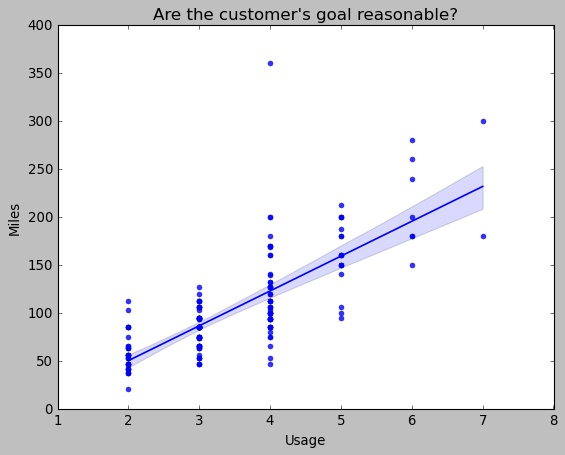

In [63]:
def plotUsageMileCorr():
    ax8 = sns.regplot(x='Usage', y='Miles', data=df,
                      fit_reg=True, ax=ax[0,1])
    ax8.set_title("Are the customer's goal reasonable?", fontsize=15)
    ax8.set_xlim(left=1, right=8)

ax = sns.regplot(x='Usage', y='Miles', data=df,
                  fit_reg=True)
ax.set_title("Are the customer's goal reasonable?", fontsize=15)
ax.set_xlim(left=1, right=8)
plt.show()

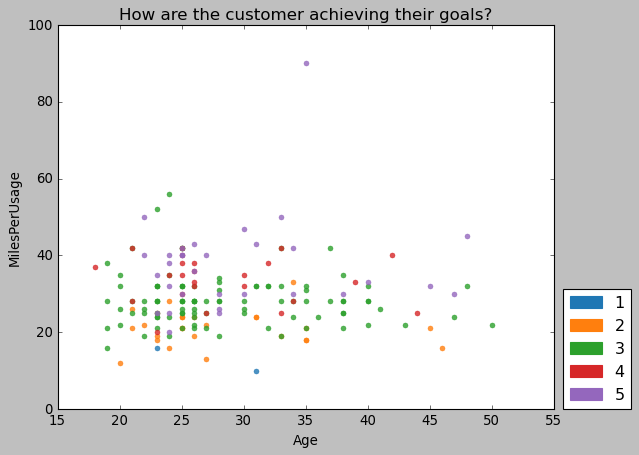

In [64]:
def plotAgeFitMPSCorr():
    ax9 = hue_regplot(data=df, x='Age', y='MilesPerUsage', hue='Fitness', ax=ax[1,0])
    levels = sorted(df['Fitness'].unique())
    default_colors = get_cmap('tab10')
    palette = {k: default_colors(i) for i, k in enumerate(levels)}
    patchList = []
    for key in palette:
        data_key = mpatches.Patch(color=palette[key], label=key)
        patchList.append(data_key)
    ax9.legend(handles=patchList,loc=(1.02,0))
    ax9.set_title("How are the customer achieving their goals?", fontsize=15)
    
ax = hue_regplot(data=df, x='Age', y='MilesPerUsage', hue='Fitness')
ax.set_title("How are the customer achieving their goals?", fontsize=15)
levels = sorted(df['Fitness'].unique())
default_colors = get_cmap('tab10')
palette = {k: default_colors(i) for i, k in enumerate(levels)}
patchList = []
for key in palette:
    data_key = mpatches.Patch(color=palette[key], label=key)
    patchList.append(data_key)
ax.legend(handles=patchList,loc=(1.02,0))
plt.show()

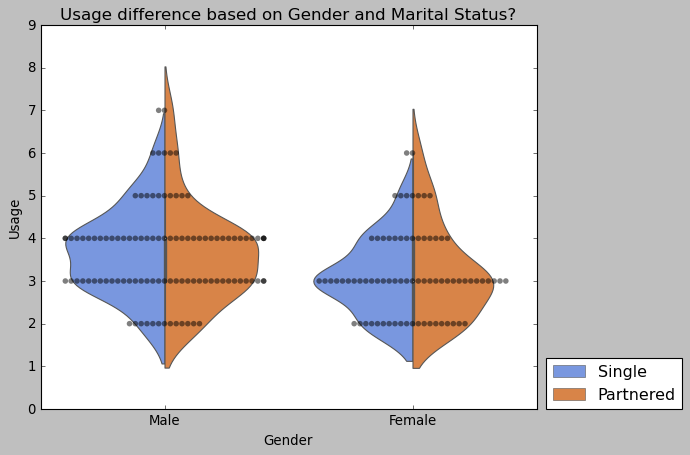

In [65]:
def plotGenMStatUsage():
    ax10 = sns.violinplot(x='Gender', y='Usage', data=df, 
                         split=True, ax=ax[1,1],
                         hue='MaritalStatus', 
                         palette = ['#6890F0','#F08030'])
    ax10 = sns.swarmplot(x='Gender', y='Usage', data=df, ax=ax[1,1],
                        color='k', # Make points black and 
                        alpha=0.5) # slightly transparent
    ax10.legend(loc=(1.02,0))
    ax10.set_title("Usage difference based on Gender and Marital Status?", fontsize=15)

ax = sns.violinplot(x='Gender', y='Usage', data=df, 
                     split=True, 
                     hue='MaritalStatus', 
                     palette = ['#6890F0','#F08030'])
ax = sns.swarmplot(x='Gender', y='Usage', data=df, 
                    color='k', # Make points black and 
                    alpha=0.5) # slightly transparent
ax.legend(loc=(1.02,0))
ax.set_title("Usage difference based on Gender and Marital Status?", fontsize=15)
plt.show()

# Dashboards

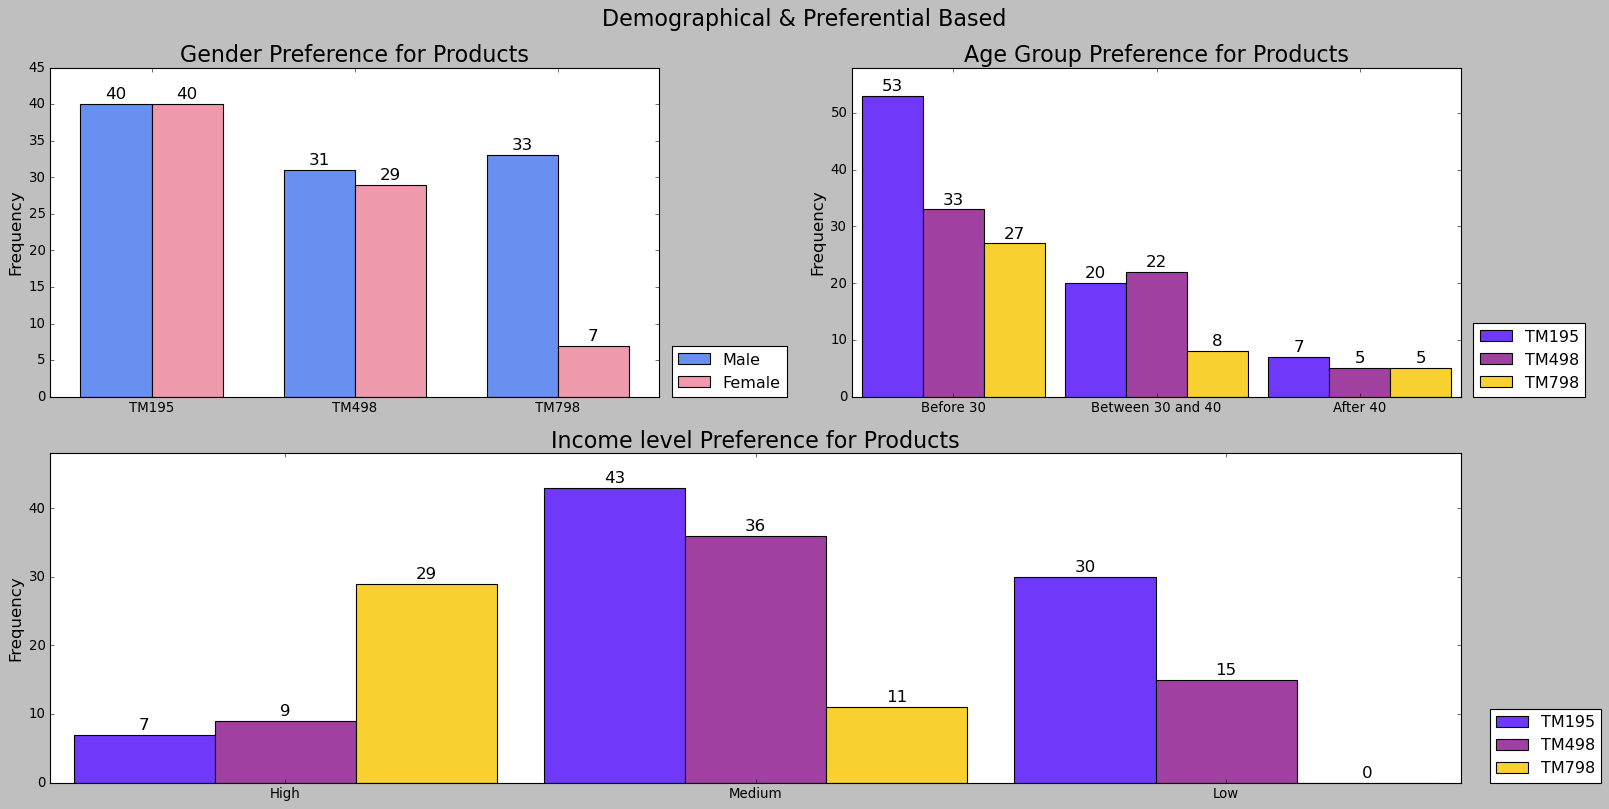

In [66]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
gs1 = GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, :])
plotGenPref()
plotAGPref()
plotIPref()
fig.suptitle("Demographical & Preferential Based", fontsize=20)
plt.show()

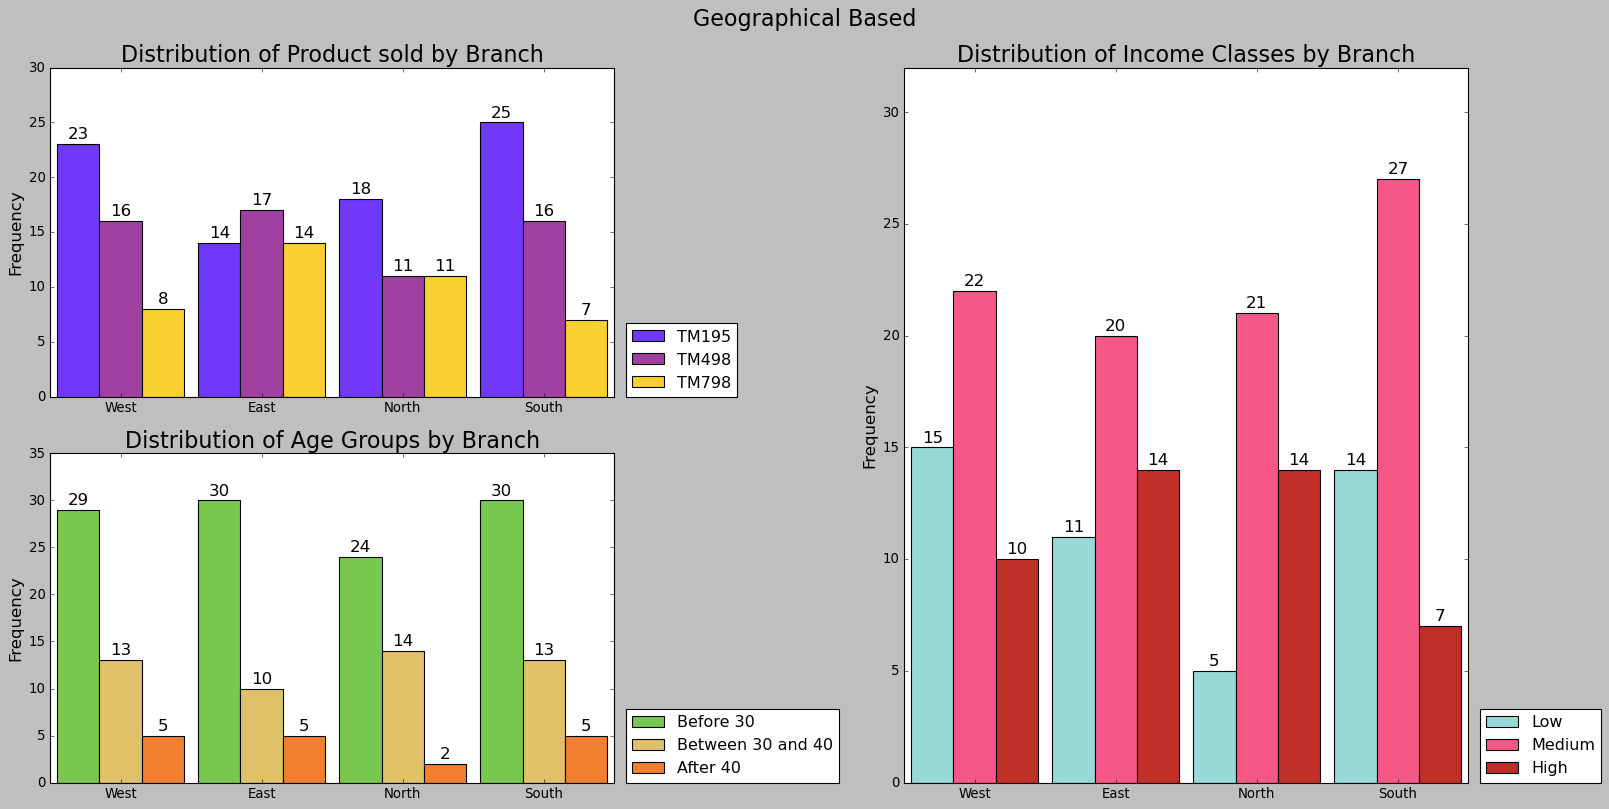

In [67]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
gs2 = GridSpec(nrows=2, ncols=2, figure=fig)

ax4 = fig.add_subplot(gs2[0, 0])
ax5 = fig.add_subplot(gs2[1, 0])
ax6 = fig.add_subplot(gs2[:, 1])
plotPBdistri()
plotAGBdistri()
plotIBBdistri()
fig.suptitle("Geographical Based", fontsize=20)
plt.show()

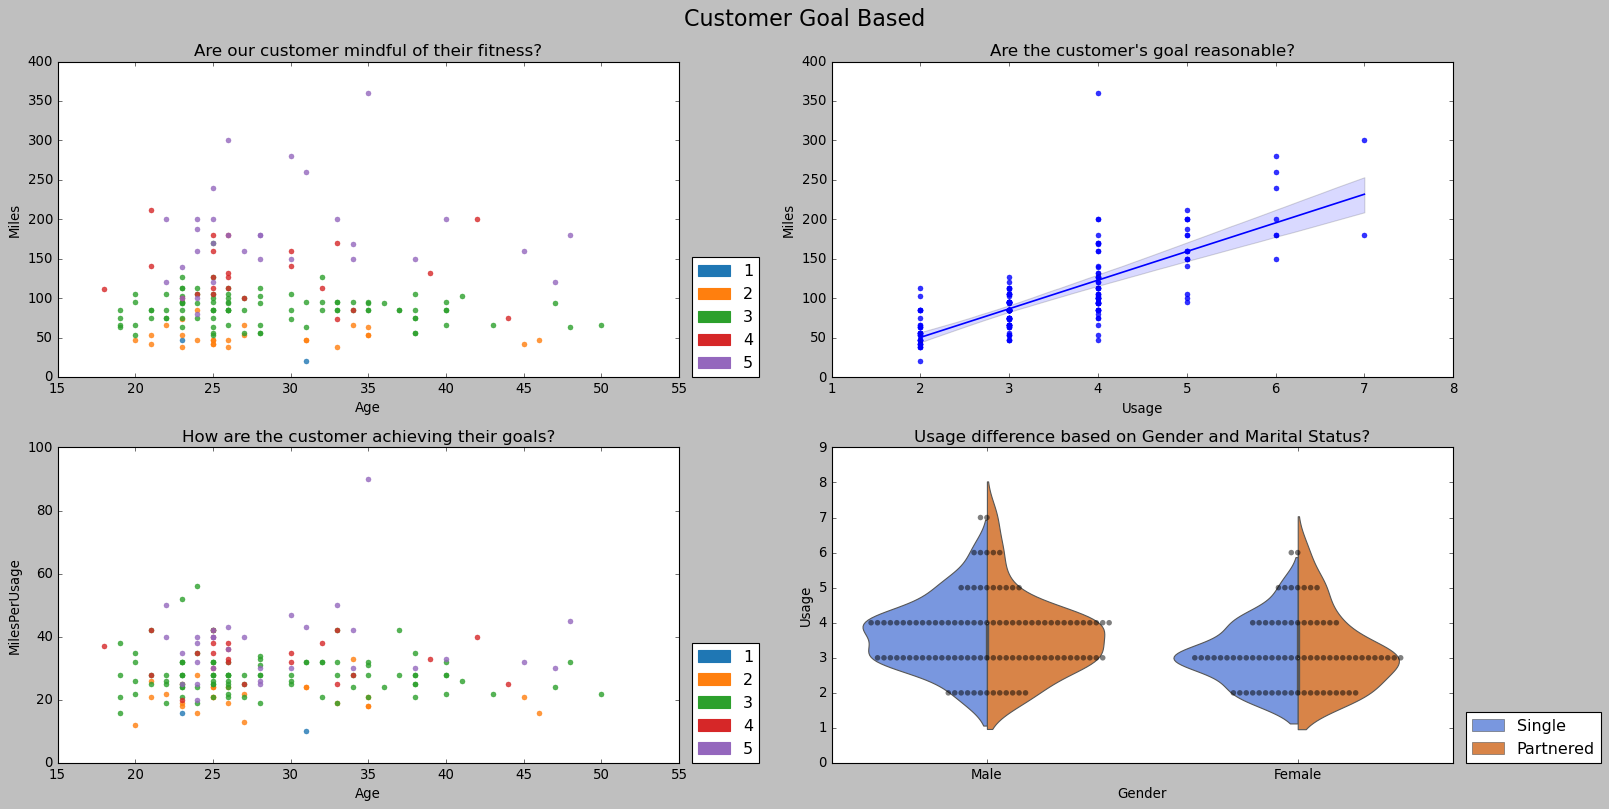

In [68]:
fig, ax = plt.subplots(2,2, figsize=(20,10), constrained_layout=True)
plotAgeMileFitCorr()
plotUsageMileCorr()
plotAgeFitMPSCorr()
plotGenMStatUsage()

fig.suptitle("Customer Goal Based", fontsize=20)
plt.show()